Nama: Michael Sotaronggal Manurung
NPM: 6181801027

Nama: Nicholas Khrisna
NPM: 6181801060

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

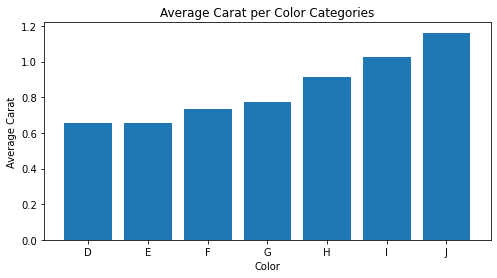

<Figure size 432x288 with 0 Axes>

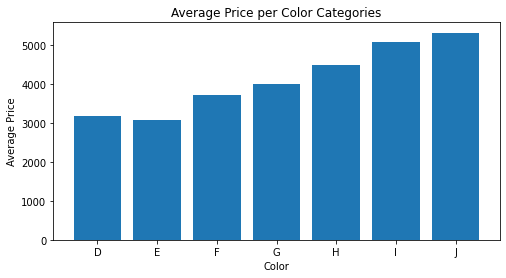

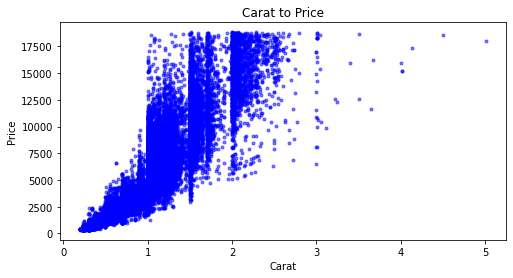

Carat to Price Correlation: 0.9215913011934772


<Figure size 432x288 with 0 Axes>

In [3]:
# store csv file as DataFrame & set Collumn 'no' as index
diamondDataFrame = pd.read_csv('diamonds.csv').set_index('No')

# menghitung rata-rata carat dari tiap warna berlian dan mengurutkannya dari yang terbaik (D) hingga terburuk (J)
colorMeanDF = diamondDataFrame.groupby('color').mean().sort_values('color', ascending=True)

plt.figure(figsize=[8,4])
plt.title('Average Carat per Color Categories')
plt.xlabel('Color')
plt.ylabel('Average Carat')
plt.bar(colorMeanDF.index, colorMeanDF['carat'])
plt.show()
plt.clf()

# plot data price per color
plt.figure(figsize=[8,4])
plt.title('Average Price per Color Categories')
plt.xlabel('Color')
plt.ylabel('Average Price')

plt.bar(colorMeanDF.index,colorMeanDF['price'])
plt.show()

# get 2 collumn (carat & price) as dataframe then sort by 'carat'
caratPriceDF = diamondDataFrame[['carat','price']].sort_values('carat')

# figure title and label
plt.figure(figsize=[8,4])
plt.title('Carat to Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# plot scatter: karena data carat dan harga cukup beragam agar grafik dapat memperlihatkan keberagaman tersebut
plt.scatter(caratPriceDF['carat'], caratPriceDF['price'], c='b', alpha=0.5, marker='.')
plt.show()
plt.clf()

print('Carat to Price Correlation: ' + str(caratPriceDF['carat'].corr(caratPriceDF['price'])))

Pada 3 grafik sebelumnya kolom data yang dieksplorasi ialah kolom price, carat, dan color. Beberapa kesimpulan yang dapat diambil ialah:
- diamond dengan color yang semakin buruk secara rata-rata cenderung memiliki karat yang lebih tinggi atau berat diamond yang lebih berat.
- diamond dengan color yang semakin buruk secara rata-rata harga diamond dijual lebih tinggi dibanding dengan diamond dengan warna yang lebih bagus.
- Pada grafk Carat to Price diketahui melalui scatter plot dan fungsi corr() dari numpy bahwa kedua kolom data memiliki korelasi positif yang kuat di angka 0.92

Pada kesimpulan 1 dan 2 diduga bahwa harga rata-rata harga color tipe J (tipe terburuk) memiliki harga rata-rata yang sangat tinggi karena jumlah data berlian pada tipe J sedikit sehingga faktor pembaginya semakin kecil sehingga perhitungan rata-rata menjadi sangat tinggi.

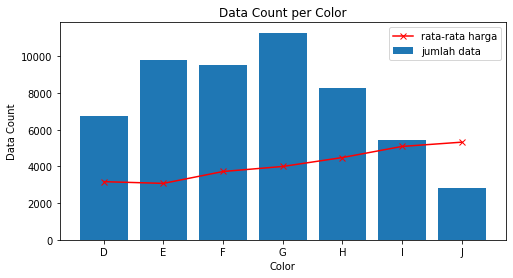

<Figure size 432x288 with 0 Axes>

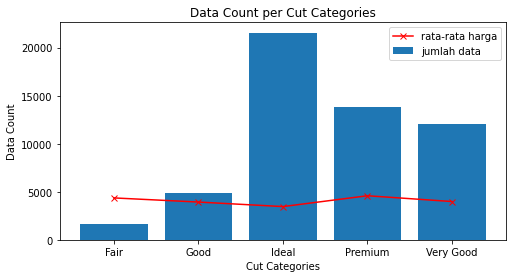

<Figure size 432x288 with 0 Axes>

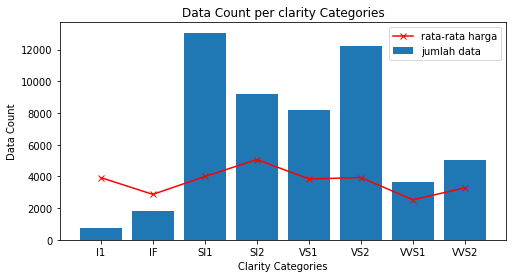

<Figure size 432x288 with 0 Axes>

In [4]:
# get 2 collumn of data: color & data count
colorDataDF = diamondDataFrame[['color','price']].sort_values('color')

# menghitung jumlah data dari tiap kategori kualitas potongan
colorDataStat = colorDataDF.groupby('color')['price'].agg(['count',np.mean])

# plot total data count for each cut categories
plt.figure(figsize=[8,4])
plt.title('Data Count per Color')
plt.xlabel('Color')
plt.ylabel('Data Count')
plt.bar(colorDataStat.index, colorDataStat['count'], label='jumlah data')
plt.plot(colorDataStat.index, colorDataStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

#get 2 collumn (cut & price)
cutPriceDF = diamondDataFrame[['cut','price']].sort_values('cut')

# menghitung jumlah data dari tiap kategori kualitas potongan
cutPriceStat = cutPriceDF.groupby('cut')['price'].agg(['count',np.mean])

# plot total data count for each cut categories
plt.figure(figsize=[8,4])
plt.title('Data Count per Cut Categories')
plt.xlabel('Cut Categories')
plt.ylabel('Data Count')
plt.bar(cutPriceStat.index, cutPriceStat['count'], label='jumlah data')
plt.plot(cutPriceStat.index, cutPriceStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

#get 2 collumn (cut & price)
clarityPriceDF = diamondDataFrame[['clarity','price']].sort_values('clarity')

# menghitung jumlah data dari tiap kategori kualitas potongan
clarityPriceStat = clarityPriceDF.groupby('clarity')['price'].agg(['count',np.mean])

# plot total data count for each clarity categories
plt.figure(figsize=[8,4])
plt.title('Data Count per clarity Categories')
plt.xlabel('Clarity Categories')
plt.ylabel('Data Count')
plt.bar(clarityPriceStat.index, clarityPriceStat['count'], label='jumlah data')
plt.plot(clarityPriceStat.index, clarityPriceStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

Dapat dilihat pada grafik data count per color bahwa memang warna J (tipe terburuk) memiliki jumlah data paling sedikit sehingga hal ini mengkonfirmasi dugaan sebelumnya. Dimana harga rata-rata diamond tipe J menjadi paling tinggi lebih didominasi karena jumlah datanya yang sedikit sehingga faktor baginya semakin kecil.

Dari visualisasi ketiga grafik diketahui harga rata-rata untuk setiap kualitas baik berdasarkan color, cut, atau clarity cukup beragam dan tidak linear.

Berikut eksperimen untuk membuat scatter plot untuk diamond dengan color, cut, dan clarity terbaik.

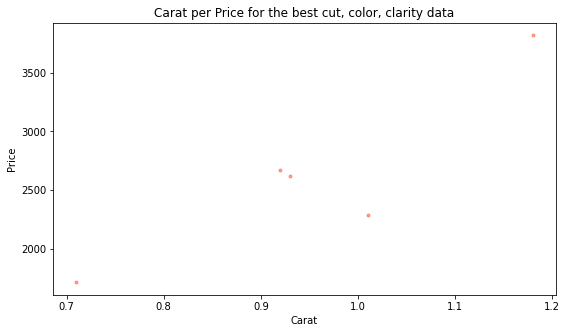

<Figure size 432x288 with 0 Axes>

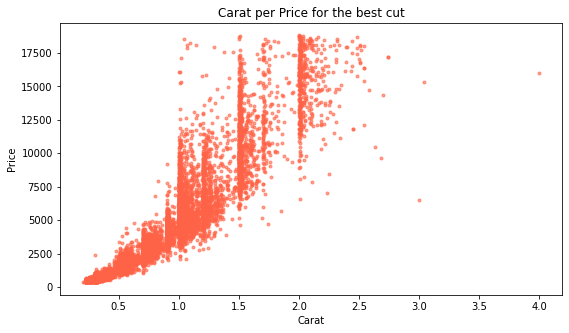

<Figure size 432x288 with 0 Axes>

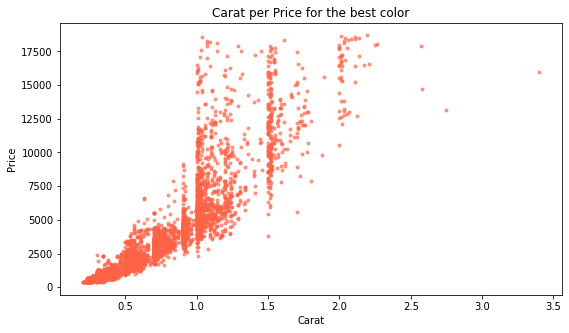

<Figure size 432x288 with 0 Axes>

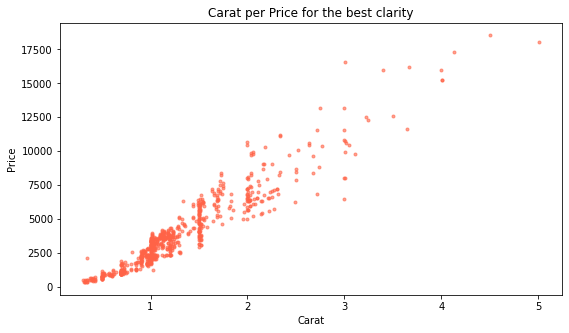

<Figure size 432x288 with 0 Axes>

In [5]:
# filter data berdasarkan kategori kualitas potongan terbaik dari cut, color, dan claritynya
bestCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['cut'] == 'Very Good') & (diamondDataFrame['color'] == 'D') & (diamondDataFrame['clarity'] == 'I1')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best cut, color, clarity data')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestCategoryDiamondDF['carat'], bestCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()
# print(bestCategoryDiamondDF)

# karena data hasil filter dengan kategori kualitas potongan terbaik sangat sedikit maka lakukan ploting terbaik untuk setiap kategori secara terpisah
bestCutCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['cut'] == 'Very Good')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestCutCategoryDiamondDF['carat'], bestCutCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()

bestColorCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['color'] == 'D')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best color')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestColorCategoryDiamondDF['carat'], bestColorCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()

bestClarityCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['clarity'] == 'I1')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best clarity')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestClarityCategoryDiamondDF['carat'], bestClarityCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()

Tahap eksplorasi berikutnya untuk mencari hubungan antara x,y,z dan depth diamond tersebut untuk beberapa kategori seperti cut, color, dan claritynya

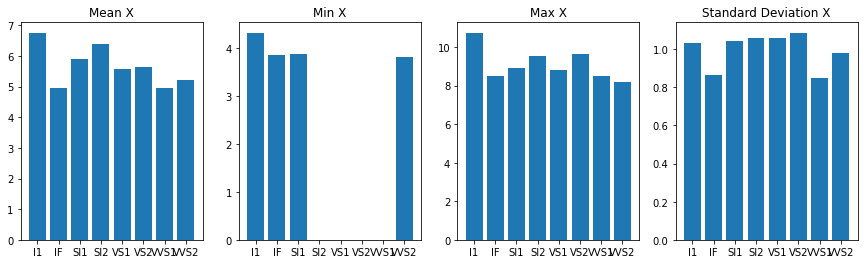

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

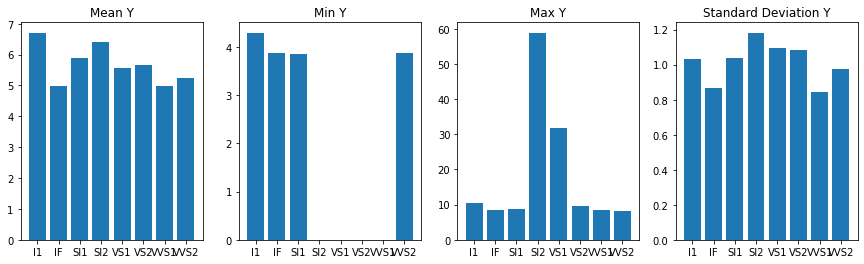

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

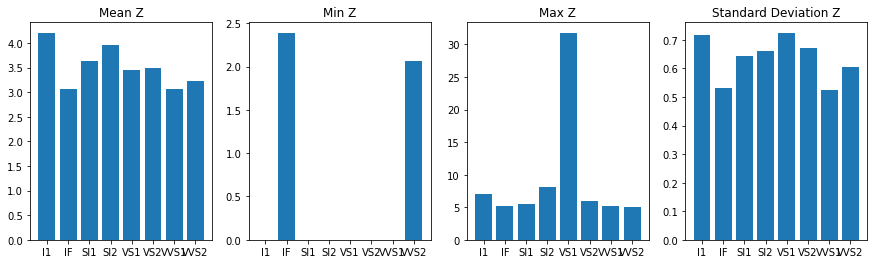

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

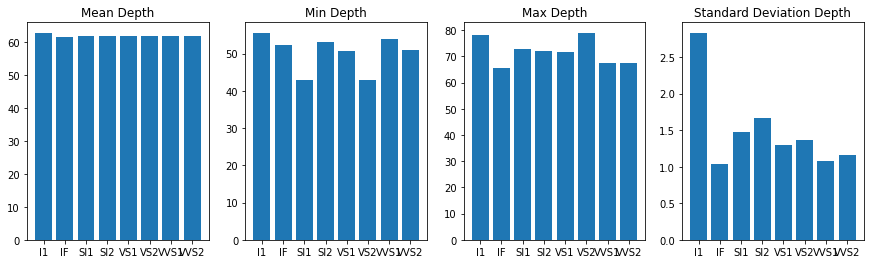

<Figure size 432x288 with 0 Axes>

In [40]:
dataMeanClarityDF = diamondDataFrame[['clarity','x','y','z','depth']].groupby('clarity').agg(['count',np.mean, np.std, np.min, np.max])

# ploting data mean, std, min, max for each X attribute
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(15)
fig.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['mean'])
axs[0].title.set_text('Mean X')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['amin'])
axs[1].title.set_text('Min X')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['amax'])
axs[2].title.set_text('Max X')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['std'])
axs[3].title.set_text('Standard Deviation X')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Y attribute
fig2 = plt.figure()
fig2, axs = plt.subplots(1, 4)
fig2.set_figwidth(15)
fig2.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['mean'])
axs[0].title.set_text('Mean Y')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['amin'])
axs[1].title.set_text('Min Y')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['amax'])
axs[2].title.set_text('Max Y')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['std'])
axs[3].title.set_text('Standard Deviation Y')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Z attribute
fig3 = plt.figure()
fig3, axs = plt.subplots(1, 4)
fig3.set_figwidth(15)
fig3.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['mean'])
axs[0].title.set_text('Mean Z')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['amin'])
axs[1].title.set_text('Min Z')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['amax'])
axs[2].title.set_text('Max Z')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['std'])
axs[3].title.set_text('Standard Deviation Z')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each depth attribute
fig4 = plt.figure()
fig4, axs = plt.subplots(1, 4)
fig4.set_figwidth(15)
fig4.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['mean'])
axs[0].title.set_text('Mean Depth')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['amin'])
axs[1].title.set_text('Min Depth')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['amax'])
axs[2].title.set_text('Max Depth')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['std'])
axs[3].title.set_text('Standard Deviation Depth')
plt.show()
plt.clf()


In [21]:
# debug code

# print(diamondDataFrame.head())
# print(diamondDataFrame.groupby('color')['price'].mean().loc['D'])
# print(diamondDataFrame.head())
# print(caratDataStat.index, caratDataStat['count'])
print(dataMeanClarityDF['x'].head())

         count      mean       std  amin   amax
clarity                                        
I1         741  6.761093  1.030663  4.33  10.74
IF        1790  4.968402  0.863241  3.86   8.49
SI1      13065  5.888383  1.044648  3.88   8.90
SI2       9194  6.401370  1.058846  0.00   9.51
VS1       8171  5.572178  1.060848  0.00   8.83
